# Description
The wine dataset contains the results of a chemical analysis of wines grown in a specific area of Italy. Three types of wine are represented in the 178 samples, with the results of 13 chemical analyses recorded for each sample.

# Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# Goal is to implement statistical techniques to the dataset

In [45]:
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Wine-quality-challenge.csv')

In [8]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


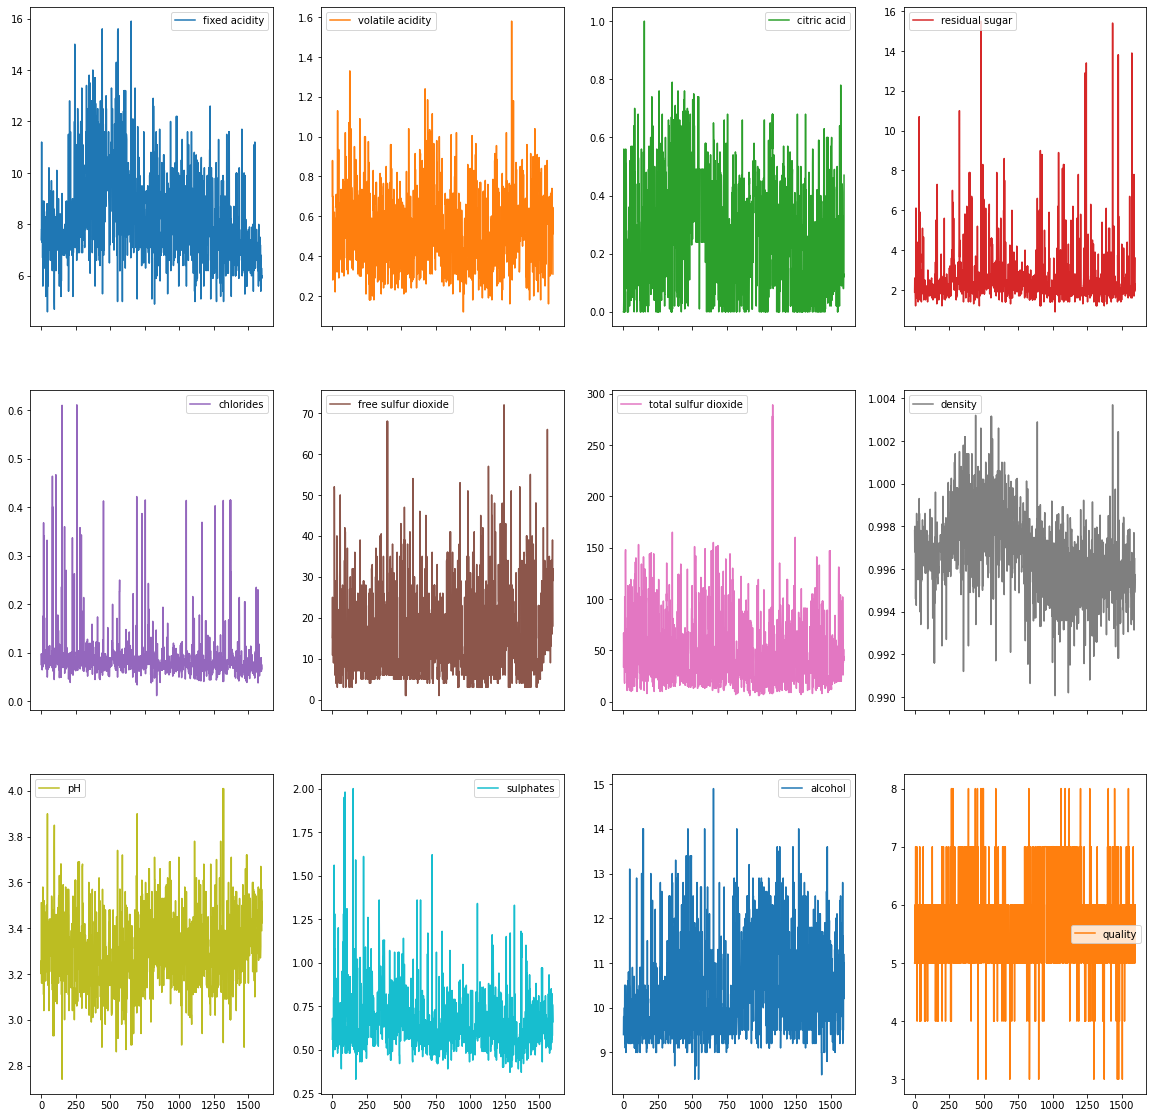

In [19]:
# Distrubition of our Data 
df.plot(subplots = True, layout = (3,4), figsize = (20,20))
plt.show()

In [26]:
# Checking the distrbution is with in 3stds of our mean for each column
col = [a for a in df.columns]
for a in col:
    x = df.loc[(df[a] <= df[a].mean()+ 3 *df[a].std())&
          (df[a]>+ df[a].mean() - 3 * df[a].std())][a].count()/df[a].count()
    print(f'The percentace of data within 3 standards of {a}:  {x}')

The percentace of data within 3 standards of fixed acidity:  0.9924953095684803
The percentace of data within 3 standards of volatile acidity:  0.9937460913070669
The percentace of data within 3 standards of citric acid:  0.9993746091307066
The percentace of data within 3 standards of residual sugar:  0.9812382739212008
The percentace of data within 3 standards of chlorides:  0.9806128830519074
The percentace of data within 3 standards of free sulfur dioxide:  0.9862414008755472
The percentace of data within 3 standards of total sulfur dioxide:  0.9906191369606003
The percentace of data within 3 standards of density:  0.9887429643527205
The percentace of data within 3 standards of pH:  0.9949968730456535
The percentace of data within 3 standards of sulphates:  0.9831144465290806
The percentace of data within 3 standards of alcohol:  0.9949968730456535
The percentace of data within 3 standards of quality:  0.9937460913070669


# The Shapiro–Wilk test
It can be used to decide whether or not a sample fits a normal distribution, and it is commonly used for small samples.
Shapiro–Wilk test should be used as it has more power to detect the nonnormality 
Basically, this test uses a null hypothesis that states that the sample comes from a normally distributed population. Thus, if the p-value obtained is greater than the chosen alpha level, this null hypothesis cannot be rejected. Conversely, if the p-value is lower than the chosen alpha level, this null hypothesis is rejected, showing evidence that the data under study is not normally distributed.

In [35]:
stat,p = st.shapiro(df.chlorides)
print(p)

0.0


In [36]:
if p >0.05:
    print("Sample looks Gaussian/ Normal(fail to reject H0)")
else:
    print('Sample does not look Gaussion/Normal(reject H0)')

Sample does not look Gaussion/Normal(reject H0)


# Standard Error
The standard error of the sample mean is an esitmate of how far the sample mean is likely to be from the populations


Formula = 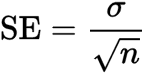

In [42]:
print(st.sem(df.alcohol))
print(st.sem(df.pH))

0.026650018979018173
0.0038608683325203784


A low standard error shows that sample means are closely distributed around the population mean

# Z-Score 
A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score.
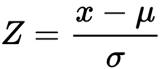
- Z	=	standard score
- x	=	observed value
- \mu	=	mean of the sample
- \sigma	=	standard deviation of the sample


In [47]:
df = df[
    (np.abs(st.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)
]

Here we use the zscore to remove outliers from our wine dataset 

# Confidence Interval
The confidence interval (CI) is a range of values that’s likely to include a population value with a certain degree of confidence. It is often expressed as a % whereby a population mean lies between an upper and lower interval
# What does a 95% confidence interval mean?
The 95% confidence interval is a range of values that you can be 95% confident contains the true mean of the population. Due to natural sampling variability, the sample mean (center of the CI) will vary from sample to sample.

The confidence is in the method, not in a particular CI. If we repeated the sampling method many times, approximately 95% of the intervals constructed would capture the true population mean.

Therefore, as the sample size increases, the range of interval values will narrow, meaning that you know that mean with much more accuracy compared with a smaller sample.

In [56]:
#Confidence interval of the mean of critri acid
print(df[['citric acid']].mean())
st.norm.interval(alpha=0.90,
                loc = df['citric acid'].mean(),
                scale =st.sem(df['citric acid']) )

citric acid    0.265382
dtype: float64


(0.2571377759673185, 0.27362721369498116)

array([[<AxesSubplot:title={'center':'citric acid'}>]], dtype=object)

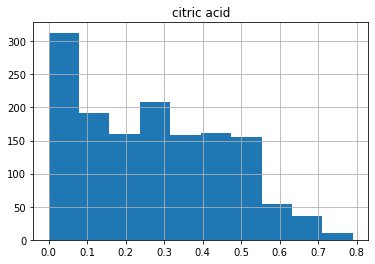

In [57]:
df[['citric acid']].hist()

In [58]:
st.norm.interval(alpha= 0.95,
                loc = df.density.mean(),
                scale = st.sem(df.density))

(0.9966218791642554, 0.9967984240748891)

<AxesSubplot:>

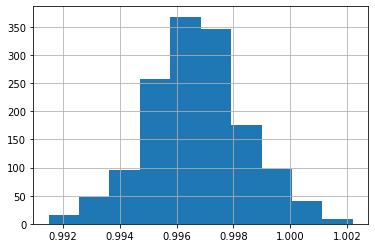

In [59]:
df.density.hist()

# T-Test
A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

In [60]:
# Here I import an another data frame that is more useful for T Testing. 
data = pd.read_csv("stackoverflow.csv")

In [61]:
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
# subset the data for uk using the salary column
salary_uk = data.loc[data['Country'] == "United Kingdom",'Salary']
salary_uk

0       100000.0
11       32500.0
12       30000.0
17       32500.0
18       43750.0
          ...   
5575     53750.0
5577     45000.0
5580     43750.0
5589     88750.0
5592     33750.0
Name: Salary, Length: 1023, dtype: float64

In [76]:
# subset the data for germany using the salary colum
salary_ge = data.loc[data['Country'] == "Germany",'Salary']
salary_ge

3       64516.129030
7       53763.440860
9       83870.967740
25      10752.688170
43      59139.784950
            ...     
5570    60215.053760
5571    48387.096770
5574    69892.473120
5578     8602.150538
5579    41935.483870
Name: Salary, Length: 757, dtype: float64

# H0 Salaries From UK and Germany are the same 
# H1 Salaries are different 


In [124]:
alpha = 0.05


results   = st.ttest_ind(a = salary_uk,b = salary_ge, equal_var =  False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  0.024629864546331655
We reject the null hypothesis


In [125]:
india = data.query('Country == "India"')
us = data.query('Country == "United States"')


# H0 years of  experince of  Countries are similar 
# H1 years of  experince of  Countries are different  

In [126]:



alpha = 0.05

results   = st.ttest_ind(a = us['YearsCodedJob'],b =india['YearsCodedJob'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  5.225676347614714e-58
We reject the null hypothesis


We can see below that Us people have more experienced 

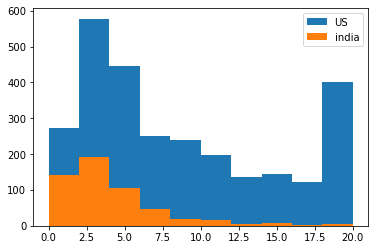

In [127]:
plt.hist(us['YearsCodedJob'], label = "US")
plt.hist(india['YearsCodedJob'],label = "india")
plt.legend();


scipy.stats.ttest_1samp Calculates the T-test for the mean of ONE group of scores. This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean

In [97]:

alpha = 0.05  # critical statistical significance

results = st.ttest_1samp(us['YearsCodedJob'], data.YearsCodedJob.mean() )

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  7.71192117136959e-12
We reject the null hypothesis


Here we are testing using the ttest_1samp to see where the years coded from the us is the same to the average years coded for the whole data frame 


We Reject the Null hypothesis mean the US is the not the same as the average years coded  we can print the mean of our dataset for each of those inputs to see 

In [100]:
us['YearsCodedJob'].mean()

8.270870655678968

In [101]:
data.YearsCodedJob.mean() 

7.4488737933500175

 We can see that the us has higher years coded from our data 

#  Chi-squared test

 is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance, A Chi-square test is designed to analyze categorical data. That means that the data has been counted and divided into categories.

In [111]:
# Here we create a cross tab between our country and remote workers 
tab = pd.crosstab(index = data.Country,
                 columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [112]:
chi2, p,dof,exp = st.chi2_contingency(tab )
print(p)

3.321120877301216e-16


# H0 There is no relationship between remote workers and non remote 
# H1 There is strong relationship between remote workers and non remote

In [113]:
alpha = 0.05  # critical statistical significance

chi2, p, dof, exp = st.chi2_contingency(tab )

print('p-value: ', p)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  3.321120877301216e-16
We reject the null hypothesis


In [115]:
data

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,United Kingdom,88750.000000,8,0,1,1000,Not remote,8,0,0,...,0,0,0,0,0,0,0,0,0,1
5590,India,6460.138012,2,0,1,10000,Not remote,6,0,0,...,0,1,0,0,0,0,0,0,0,0
5591,India,4228.453972,2,0,1,1,Not remote,10,0,0,...,0,0,0,0,0,0,1,0,0,0
5592,United Kingdom,33750.000000,1,1,1,100,Not remote,6,0,0,...,0,0,0,0,0,0,0,0,0,1


In [118]:
# Chi Square test between company size and hobbies 
tab2 = pd.crosstab(index = data.Hobby,
                  columns = data.CompanySizeNumber)
tab2

CompanySizeNumber,1,10,20,100,500,1000,5000,10000
Hobby,,,,,,,,
0,101,123,293,245,91,180,60,243
1,311,400,961,918,309,436,192,731


In [119]:
chi2, p,dof,exp = st.chi2_contingency(tab2 )
print(p)

0.025708455559671013


# H0 There is no relationship between Company size and hobbies 
# H1 There is a relationship between company size and hobbies 

In [123]:
alpha = 0.05  # critical statistical significance

chi2, p, dof, exp = st.chi2_contingency(tab2 )

print('p-value: ', p)

if p < alpha:
    print('We reject the null hypothesis(reject H0)')
else:
    print("We can't reject the null hypothesis(fail to reject H0)")

p-value:  0.025708455559671013
We reject the null hypothesis(reject H0)
